In [ ]:
#Conjunto de importacoes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("dados_cryotherapy.csv")
df.head()

,Sexo,Idade,Tempo,Numero_Verrugas,Tipo,Area,Resultado_Tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0


In [ ]:
#0 = não conseguiu sucesso do tratamento
#1 = conseguiu sucesso do tratamento

In [ ]:
df.columns = ["sexo","idade","tempo","numero_verrugas","tipo","area","resultado_tratamento"]
df.head()

,sexo,idade,tempo,numero_verrugas,tipo,area,resultado_tratamento
0,1,35,12,5,1,100,0
1,1,29,7,5,1,96,1
2,1,50,8,1,3,132,0
3,1,32,11,7,3,750,0
4,1,67,9,1,1,42,0


In [ ]:
data_treino = np.array(df[["sexo","idade","tempo","numero_verrugas","tipo","area"]])
data_class = np.array(df["resultado_tratamento"])

In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=10): #pega o dado do dataframe e verifica se tem correlação entre os dados
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

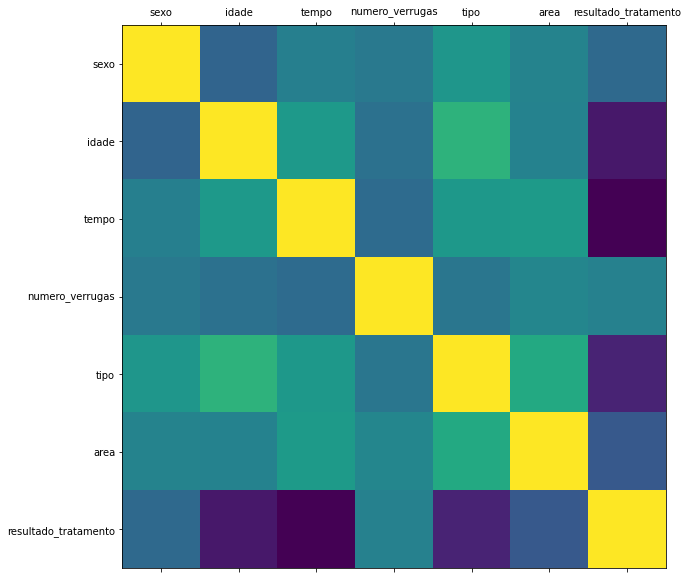

In [ ]:
plot_corr(df)

In [ ]:
#separar o treino e o teste

In [ ]:
x_treino,x_class,y_treino,y_class = train_test_split(data_treino,data_class,test_size = 0.25)

In [ ]:
#Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_class)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[  2  40   9   1   2  80]
 [  2  15   6   2   1  30]
 [  2  22   5   2   1  70]
 [  2  32  12   4   3 750]
 [  2  15   2  10   3  70]
 [  1  20   1   2   1  75]
 [  1  50   8  11   3 132]
 [  2  16   8   1   2  60]
 [  1  50   8   1   3 132]
 [  2  67  12  12   3  42]
 [  2  23   9   5   3  72]
 [  1  34  11   1   3 150]
 [  1  35   7   2   1 100]
 [  2  28   5   9   1 100]
 [  2  28   4  11   1 100]
 [  1  32  11   7   3 750]
 [  2  20   3   6   1  75]
 [  2  24   9   3   3  20]
 [  2  17  11   2   1  10]
 [  1  29   7   6   1  96]
 [  2  21  10   5   1  35]
 [  1  40  11   9   2  80]
 [  1  24  10  10   1  20]
 [  2  36  10   4   1   8]
 [  1  27  10   7   1   6]
 [  1  29   7   5   1  96]
 [  2  36  11   6   1   8]
 [  1  36  11   2   1   8]
 [  1  15   4   7   1   6]
 [  1  18   4   1   1  80]
 [  1  67  10   7   1  42]
 [  2  27   8   2   1   6]
 [  1  67   3  11   3  20]
 [  1  30   1  10   1 115]
 [  1  16  10   3   2  60]
 [  1  

In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_class)/len(df.index)) * 100))

74.44% nos dados de treino
25.56% nos dados de teste


In [ ]:
# - Aplicando o Algoritmo com o Naive Bayes - GaussianNB.

In [ ]:
#Treinamento do modelo com os dados atribuidos ao conjunto de treinamento

modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

GaussianNB()

In [ ]:

print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.8059701492537313
Na Base de Treinamento


In [ ]:

print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_class)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_class, y_pred_val))
print("na Base de Teste")


Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.9565217391304348
na Base de Teste


In [ ]:
from sklearn import metrics

In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_class, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_class, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[13  1]
 [ 0  9]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        14
           0       0.90      1.00      0.95         9

    accuracy                           0.96        23
   macro avg       0.95      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23



In [ ]:
#implementando o algortimo randomForest
from sklearn.ensemble import RandomForestClassifier

In [ ]:

modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())


RandomForestClassifier(random_state=42)

In [ ]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_class)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_class, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.9565



In [ ]:
#implementando logistica de regressão
from sklearn.linear_model import LogisticRegression

In [ ]:
# Terceira versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_class)

In [ ]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_class, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_class, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.9130

Classification Report
              precision    recall  f1-score   support

           1       0.93      0.93      0.93        14
           0       0.89      0.89      0.89         9

    accuracy                           0.91        23
   macro avg       0.91      0.91      0.91        23
weighted avg       0.91      0.91      0.91        23



In [ ]:
#nesse metodo seria melhor o uso do algoritmo de nayvvi bails acurácia : 88%

In [ ]:
import joblib

In [ ]:
#Persistência do modelo no arquivo modelo_crioterapia_MNB.pkl=> criando o modelo e guardando ele
joblib.dump(modelo_NB, 'modelo_crioterapia_MNB.pkl')

['modelo_crioterapia_MNB.pkl']